(32, 32, 3)


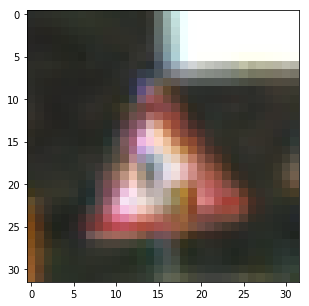

86.6510416667
68.7962200615


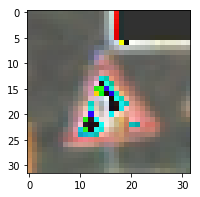

107.817708333
45.7923085217
gamma 1.76697916667
(32, 32, 3)


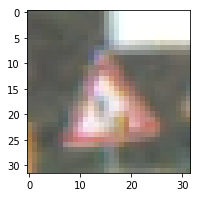

129.5703125
54.9024668248


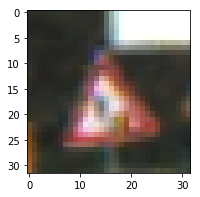

86.6510416667
68.7962200615
brightness 86.6510416667
-33


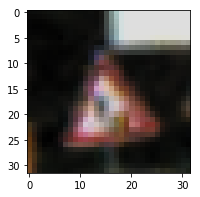

shifts 0 -1


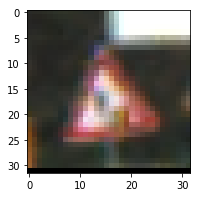

719.921762996


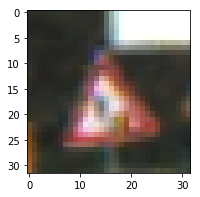

[[ 0.5  0.5]
 [ 0.   0. ]]


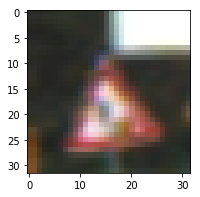

459.146816572
0.851894789729398
before padding (26, 26, 3)
padding 3.0 3.0
shape after (32, 32, 3)


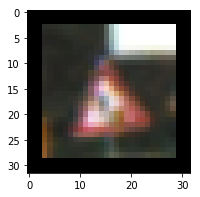

1.0860907955798056
shape after (32, 32, 3)


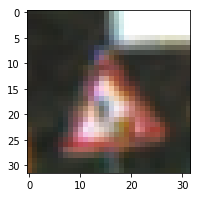

1.138664263932362
shape after (32, 32, 3)


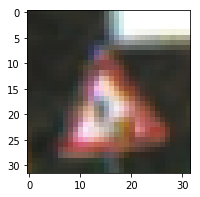

1.1287135019985715
shape after (32, 32, 3)


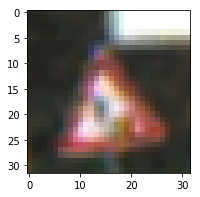

1.087233250883556
shape after (32, 32, 3)


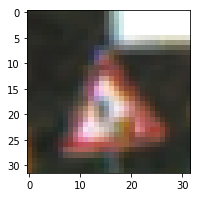

1.1384603969596274
shape after (32, 32, 3)


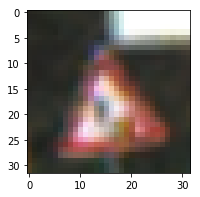

0.9364091017976259
before padding (28, 28, 3)
padding 2.0 2.0
shape after (32, 32, 3)


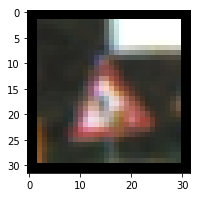

0.8609493490898208
before padding (26, 26, 3)
padding 3.0 3.0
shape after (32, 32, 3)


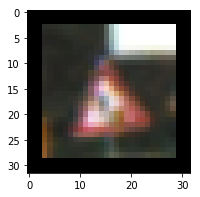

1.06117171536133
shape after (32, 32, 3)


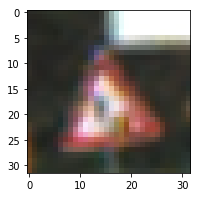

1.0040143981186571
shape after (32, 32, 3)


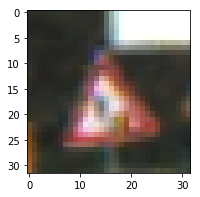

In [81]:
# Load pickled data
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from tqdm import tqdm
import random
import cv2
import numpy as np


def bgr_to_rgb(bgr):
    rgb = bgr[...,::-1]
    return rgb


def gamma_change(img, gamma):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'data/train.p'
validation_file='data/valid.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


index = random.randint(0, len(X_train))
image = X_train[index].squeeze()
print( image.shape)

plt.figure(figsize=(5,5))
plt.imshow(image)
plt.show()
print (image.mean())
print(image.std())

image2 = np.clip(image + 50, 0, 255)
plt.figure(figsize=(3,3))
plt.imshow(image2)
plt.show()

print (image2.mean())
print(image2.std())

image3 = image
image_mean = image3.mean()
"""
if image_mean < 50:
    image3 = gamma_change(image3,3)
elif image_mean > 50 and image_mean <100:
    image3 = gamma_change(image3,2)
elif image_mean >100 and image_mean <150:
    image3 = gamma_change(image3,1.5)
elif image_mean >150:
    image3 = gamma_change(image3,0.5)
"""
contrast = image3.std() 
if contrast > 70:
    contrast_correction = 1
else:
    contrast_correction = 0

gamma_multiplier = np.clip(3.5 - (image_mean / 50), 0.5, 3.5) + contrast_correction
print ("gamma", gamma_multiplier)
image3 = gamma_change(image3,gamma_multiplier)

print(image3.shape)
plt.figure(figsize=(3,3))
plt.imshow(image3)
plt.show()

print (image3.mean())
print(image3.std())



plt.figure(figsize=(3,3))
plt.imshow(image)
plt.show()
print (image.mean())
print(image.std())
image4 = image 

for i in range(1):
    image4 = image 
    bright = image4.mean()
    print ("brightness", bright)
    image4 = cv2.cvtColor(image4,cv2.COLOR_BGR2HSV)
    v = image4[...,2]
    brightness_change = np.random.randint(-40,40)
    print (brightness_change)
    v2 = cv2.add(v,brightness_change)
    image4[...,2] = v2
    image4 = cv2.cvtColor(image4,cv2.COLOR_HSV2BGR)
    plt.figure(figsize=(3,3))
    plt.imshow(image4)
    plt.show()

for i in range(1):
    image4 = image 
    shift_x = np.random.randint(-5,5)
    shift_y = np.random.randint(-5,5)
    print ("shifts",shift_x,shift_y)
    move_matrix = np.float32([[1,0,shift_x],[0,1,shift_y]])
    image5 = cv2.warpAffine(image4,move_matrix,(32,32))
    plt.figure(figsize=(3,3))
    plt.imshow(image5)
    plt.show()

# directional blur based on packtub publication "open cv with python by example"
for i in range(1):
    image6 = image 
    image_sharpness = cv2.Laplacian(image6, cv2.CV_64F).var()
    print (image_sharpness)
    plt.figure(figsize=(3,3))
    plt.imshow(image6)
    plt.show()
    
    if image_sharpness > 150:
        size = np.random.randint(1,5)
        kernel = np.zeros((size,size))
        kernel[int((size-1)/2),:] = np.ones(size)
        kernel = kernel / size
        print (kernel)

        image6 = cv2.filter2D(image6, -1 ,kernel)
        plt.figure(figsize=(3,3))
        plt.imshow(image6)
        plt.show()
        print (cv2.Laplacian(image6, cv2.CV_64F).var())
    else:
        print ("not so sharp")

for i in range(10):
    image7 = image 
    scale = np.random.uniform(0.8,1.2)
    print (scale)
    if scale > 1:
        image7 = cv2.resize(image7,None, fx=scale,fy=scale,interpolation = cv2.INTER_CUBIC)
        start_x = int((image7.shape[0]-32)/2)
        start_y = int((image7.shape[0]-32)/2)
        image8 = image7[start_x:start_x+32 , start_y:start_y+32]
        #crop
    else:
        scale =  (scale * 32 - (scale *32 %2)) / 32
        image7 = cv2.resize(image7,None, fx=scale,fy=scale,interpolation = cv2.INTER_AREA)
        print ("before padding", image7.shape)
        horiz_pad = np.ceil((32-image7.shape[0])/2) 
        vertical_pad = np.ceil((32-image7.shape[1])/2) 
        print ("padding", horiz_pad, vertical_pad)
        horiz_pad = int(horiz_pad)
        vertical_pad = int(vertical_pad)
        
        image8 = cv2.copyMakeBorder(image7, horiz_pad, horiz_pad, vertical_pad, vertical_pad, cv2.BORDER_CONSTANT, (0,0,0))
        
        #pad
        
    print ("shape after", image8.shape)
    plt.figure(figsize=(3,3))
    plt.imshow(image8)
    plt.show() 